In [2]:
import pandas as pd

# Load the data
file_path = 'Data Olah DO Skripsi mifzal.csv'
data = pd.read_csv(file_path, delimiter=';', decimal=',')

# Define the function to update the 'Status' column based on the conditions
def update_status(row):
    if row['IP'] < 2.50 or row['IPK'] < 2.50 or row['Jumlah Cuti'] > 2 or row['Jumlah Kehadiran'] < 50:
        return 'DO'
    elif row['Jumlah Cuti'] < 2:
        return 'Tidak DO'
    else:
        return row['Status']  # Keep the existing status if none of the conditions are met

# Apply the function to update the 'Status' column
data['Status'] = data.apply(update_status, axis=1)

# Save the updated dataframe to a new CSV file with commas as decimal points
data['IP'] = data['IP'].apply(lambda x: f"{x:.2f}".replace('.', ','))
data['IPK'] = data['IPK'].apply(lambda x: f"{x:.2f}".replace('.', ','))

# Save the updated dataframe to a new CSV file
output_path = 'updated_data_train1.csv'
data.to_csv(output_path, sep=';', index=False, decimal=',')

# Display the updated dataframe
data.head(1000)

,Nama,Prodi,NIM,Jenjang,IP,IPK,Jumlah Cuti,Jumlah Semester,Jumlah Kehadiran,Status
0,M. AL ISRAQ SYARIF,Teknologi Rekayasa Instrumentasi Dan Kontrol,1520301001,D4,"3,20","3,00",2,8,32,DO
1,Rahima Diniati,Teknologi Rekayasa Instrumentasi Dan Kontrol,1520301002,D4,"2,63","2,87",0,8,45,DO
2,Salamah,Teknologi Rekayasa Instrumentasi Dan Kontrol,1520301003,D4,"2,79","2,91",0,8,41,DO
3,ITA ZAHARA,Teknologi Rekayasa Instrumentasi Dan Kontrol,1520301005,D4,"2,89","2,89",0,8,33,DO
4,Nolarita,Teknologi Rekayasa Instrumentasi Dan Kontrol,1520301006,D4,"2,95","3,23",0,8,69,Tidak DO
...,...,...,...,...,...,...,...,...,...,...
995,WAHYU AIDIL SAPUTRA,Teknologi Rekayasa Komputer Jaringan,1590343037,D4,"3,26","3,25",0,8,90,Tidak DO
996,Naiwa Rosalaini,Teknologi Rekayasa Komputer Jaringan,1590343039,D4,"3,42","3,47",0,8,68,Tidak DO
997,Syahara Dwi Kesuma,Teknologi Rekayasa Komputer Jaringan,1590343040,D4,"3,42","3,37",0,8,30,DO
998,Noviyanti,Teknologi Rekayasa Komputer Jaringan,1590343041,D4,"2,89","3,05",0,8,55,Tidak DO


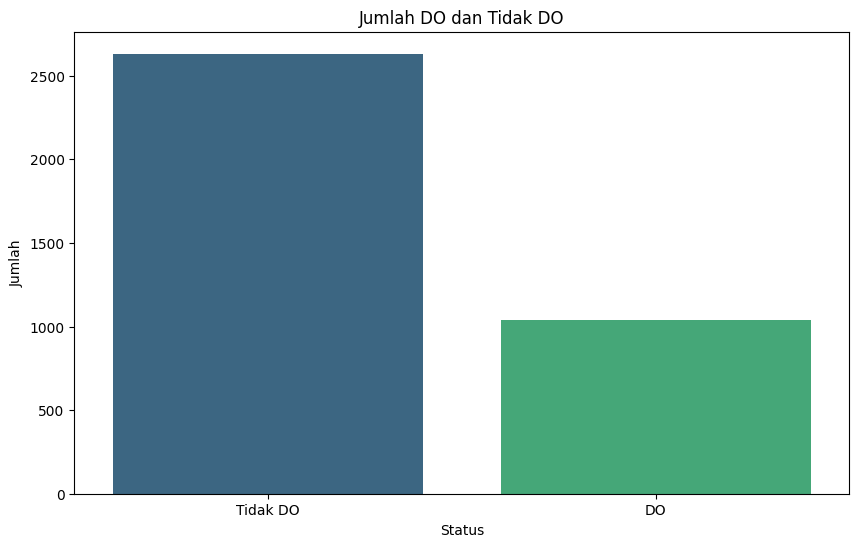

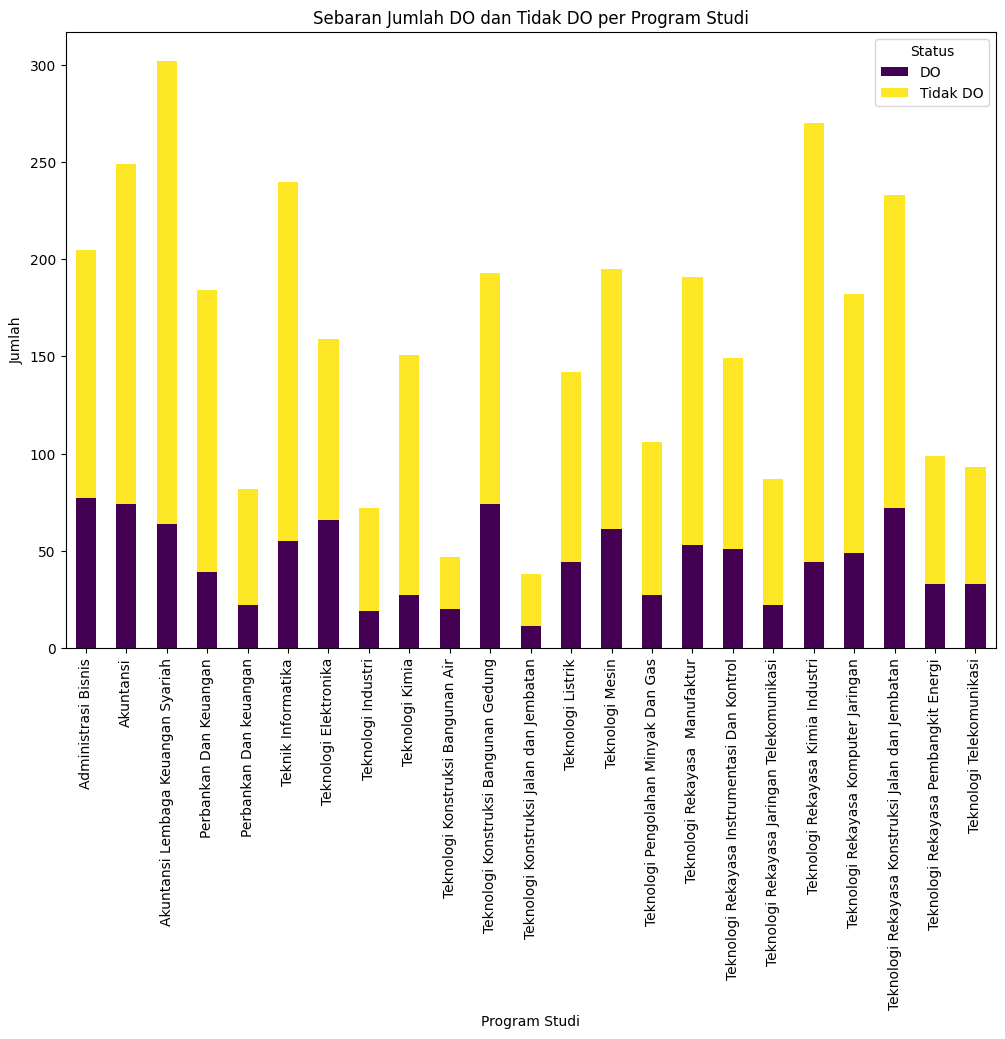

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = 'Data Olah DO Skripsi mifzal.csv'
data = pd.read_csv(file_path, delimiter=';', decimal=',')

# Define the function to update the 'Status' column based on the conditions
def update_status(row):
    if row['IP'] < 2.50 or row['IPK'] < 2.50 or row['Jumlah Cuti'] > 2 or row['Jumlah Kehadiran'] < 50:
        return 'DO'
    elif row['Jumlah Cuti'] < 2:
        return 'Tidak DO'
    else:
        return row['Status']  # Keep the existing status if none of the conditions are met

# Apply the function to update the 'Status' column
data['Status'] = data.apply(update_status, axis=1)

# Save the updated dataframe to a new CSV file with commas as decimal points
data['IP'] = data['IP'].apply(lambda x: f"{x:.2f}".replace('.', ','))
data['IPK'] = data['IPK'].apply(lambda x: f"{x:.2f}".replace('.', ','))

# Save the updated dataframe to a new CSV file
output_path = 'updated_data_train1.csv'
data.to_csv(output_path, sep=';', index=False, decimal=',')

# Display the updated dataframe
data.head(1000)

# Convert IP and IPK back to float for further analysis
data['IP'] = data['IP'].str.replace(',', '.').astype(float)
data['IPK'] = data['IPK'].str.replace(',', '.').astype(float)

# Count the number of DO and Tidak DO
status_counts = data['Status'].value_counts()

# Count the number of DO and Tidak DO per program studi
status_per_prodi = data.groupby(['Prodi', 'Status']).size().unstack(fill_value=0)

# Create a bar plot for the overall DO and Tidak DO counts
plt.figure(figsize=(10, 6))
sns.barplot(x=status_counts.index, y=status_counts.values, hue=status_counts.index, palette='viridis', dodge=False, legend=False)
plt.title('Jumlah DO dan Tidak DO')
plt.xlabel('Status')
plt.ylabel('Jumlah')
plt.show()

# Create a bar plot for the number of DO and Tidak DO per program studi
status_per_prodi.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
plt.title('Sebaran Jumlah DO dan Tidak DO per Program Studi')
plt.xlabel('Program Studi')
plt.ylabel('Jumlah')
plt.legend(title='Status')
plt.show()
